# Центральная предельная теорема своими руками

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline
box = dict(facecolor='yellow', pad=3, alpha=0.2)

Сгенрируем выборку случайной величины распределенной по <b>распределению Вейбулла</b> с параметрами$\ k = 5$ и $\lambda = 1$ и вычислим теоретические матожидание и дисперсию:

In [143]:
_k = 1.50 # коэффициент формы
_lambda = 2.0 # коэффициент масштаба

# матожидание 
EX = _lambda * math.gamma(1. + 1./_k)

# дисперсия 
DX = _lambda**2 * math.gamma(1. + 2./_k) - EX**2

# зададим случайную величину
weib_rv = sts.exponweib(1, _k, 0, _lambda)

# сгенерируем 1000 значений
df = pd.DataFrame(weib_rv.rvs(size=1000))

Построим гистограмму и график теоретической плотности распределения:

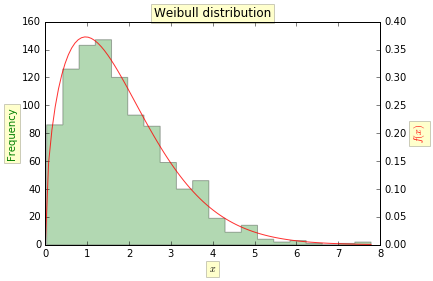

In [144]:
fig, axis_left = plt.subplots()
plt.title('Weibull distribution', bbox=box)

# гистограмма
plt.hist(df, 20, normed=0, histtype='stepfilled', color='g', alpha=0.3)
axis_left.set_ylabel('Frequency', color='g', bbox=box)
axis_left.set_xlabel('$x$', bbox=box)

# теоретическая плотность распределения
axis_right = axis_left.twinx()
x = np.linspace(0, max(df[0]), 100)
pdf = weib_rv.pdf(x)
axis_right.plot(x, pdf, 'r', alpha=0.8)
axis_right.set_ylabel('$f(x)$', color='r', bbox=box)

plt.show()

Сгенерируем 1000 выборок объёма n для нескольких значений n (5, 10, 30, 50):

In [149]:
df_lst = []
n_lst = np.array([5, 10, 50])
for n in n_lst:
    df_lst.append(pd.DataFrame([weib_rv.rvs(size = n) for i in xrange(1000)]))

Вычислим выборочные среднии на полученных выборках и определим значения параметров нормальных распределений, которыми согласно центральной предельной теореме, приближается распределение выборочных средних:

In [150]:
# выборочные среднии для каждой выборки
empirical_means_lst = []
for df in df_lst:
    empirical_means_lst.append(df.mean(axis=1))
    
# зададим нормально распределенные случайные величины
norm_rv = []
for n in n_lst:
    norm_EX = EX
    norm_DX = DX/n
    norm_rv.append(sts.norm(loc = norm_EX, scale = math.sqrt(norm_DX)))

Построим гистограммы распределений их выборочных средних и приближающие нормальные распределения, с параметрами согласно центральной предельной теореме:

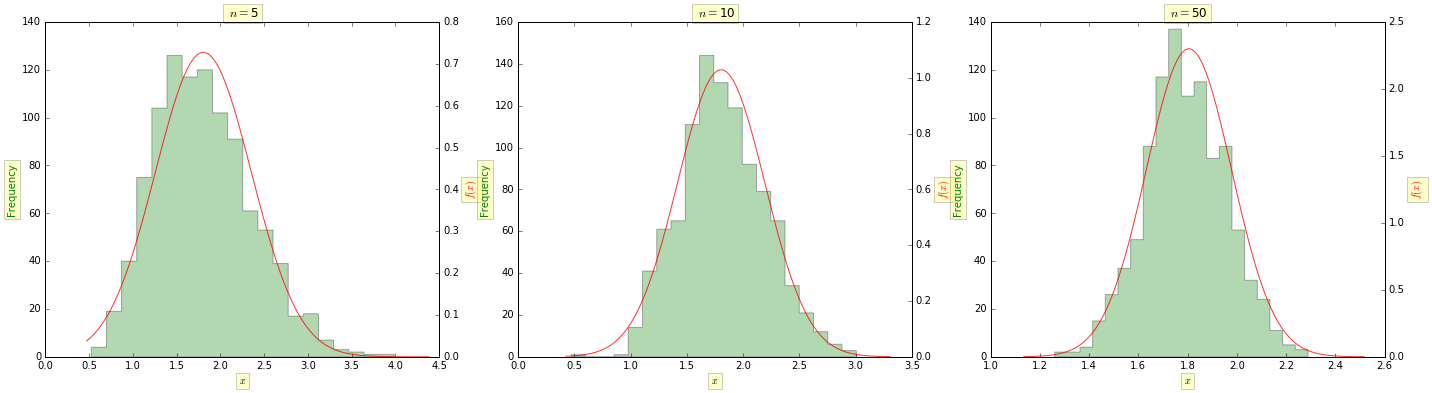

In [152]:
fig = plt.figure(figsize=(24, 6))

i = 1
for empirical_means in empirical_means_lst:
    # гистограмма
    axis_left = fig.add_subplot(100 + len(n_lst) * 10 + i)
    axis_left.set_title('$\ n = $' + str(n_lst[i-1]), bbox=box)
    plt.hist(empirical_means, 20, normed=0, histtype='stepfilled', color='g', alpha=0.3)
    axis_left.set_ylabel('Frequency', color='g', bbox=box)
    axis_left.set_xlabel('$x$', bbox=box)
    
    # теоретическая плотность распределения
    axis_right = axis_left.twinx()
    x = np.linspace(0.9*min(empirical_means), 1.1*max(empirical_means), 100)
    pdf = norm_rv[i-1].pdf(x)
    axis_right.plot(x, pdf, 'r', alpha=0.8)
    axis_right.set_ylabel('$f(x)$', color='r', bbox=box)
    
    i = i + 1

plt.show()

# Выводы:
1) Распределение выборочных средних достаточно хорошо описывается нормальным распределением<br>
2) С ростом $\ n$ повышается точность приближения распределения выборочных средних нормальным распределением